# La retropropagación (backpropagation)

La retropropagación (backpropagation) es el algoritmo fundamental para entrenar redes neuronales. Te lo explico paso a paso:

Definición:

Es un algoritmo que calcula cómo cada neurona contribuyó al error final
Propaga el error desde la salida hacia atrás a través de la red
Utiliza la regla de la cadena del cálculo diferencial


Pasos del algoritmo:
a) Forward Pass (Paso hacia adelante):

La entrada atraviesa la red
Se calcula la salida actual
Se compara con la salida deseada
Se calcula el error

b) Backward Pass (Paso hacia atrás):

Se calcula el gradiente del error respecto a cada peso
Se propaga el error desde la salida hacia la entrada
Se ajustan los pesos usando el gradiente


Fórmulas principales:

```python
# Error en la capa de salida
δₖ = (yₖ - dₖ) * f'(netₖ)
# donde:
# yₖ = salida actual
# dₖ = salida deseada
# f'() = derivada de la función de activación

# Error en capas ocultas
δⱼ = f'(netⱼ) * Σ(wⱼₖ * δₖ)

# Actualización de pesos
wᵢⱼ_nuevo = wᵢⱼ_actual - η * δⱼ * xᵢ
# donde:
# η = tasa de aprendizaje
```

```markdown
Entrada → [Capa1] → [Capa2] → [Salida] → Error 
                                        ↓
Ajuste ← [Capa1] ← [Capa2] ← [Salida] ← Gradientes 
```

In [2]:
import numpy as np
import matplotlib.pyplot as plt


| Entrada 1 | Entrada 2 | Salida |
|-----------|-----------|--------|
|     0     |     0     |   0    |
|     0     |     1     |   1    |
|     1     |     0     |   1    |
|     1     |     1     |   0    |


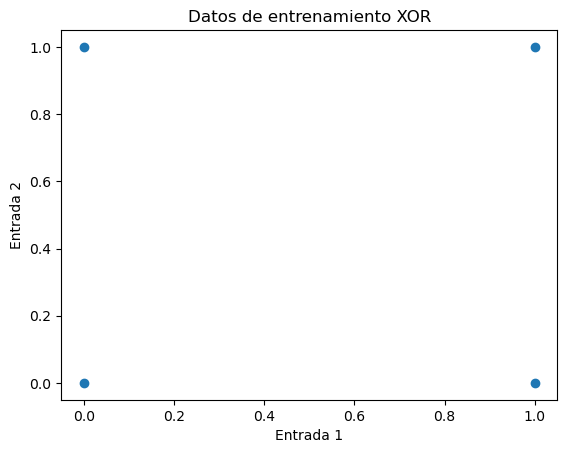

In [5]:
# Intentar clasificar los siguientes puntos de una xor


X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

plt.scatter(X[:, 0], X[:, 1])
#plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.title('Datos de entrenamiento XOR')
#plt.colorbar(label='Clase')
plt.show()

In [3]:
class RedNeuronal:
    def __init__(self, capas=[2, 3, 1]):
        """
        capas: lista con número de neuronas por capa [entrada, oculta, salida]
        """
        self.capas = capas
        # Inicialización de pesos con valores aleatorios pequeños
        self.pesos = [
            np.random.randn(capas[i], capas[i+1]) * 0.1
            for i in range(len(capas)-1)
        ]
        # Inicialización de biases
        self.biases = [
            np.random.randn(1, capas[i+1]) * 0.1
            for i in range(len(capas)-1)
        ]
        
    def sigmoid(self, x):
        """Función de activación sigmoid"""
        return 1 / (1 + np.exp(-x))
    
    def sigmoid_derivada(self, x):
        """Derivada de la función sigmoid"""
        return x * (1 - x)
    
    def forward(self, X):
        """
        Propagación hacia adelante
        Guarda las activaciones para usar en backpropagation
        """
        self.activaciones = [X]
        for i in range(len(self.pesos)):
            net = np.dot(self.activaciones[-1], self.pesos[i]) + self.biases[i]
            self.activaciones.append(self.sigmoid(net))
        return self.activaciones[-1]
    
    def backward(self, X, y, learning_rate=0.1):
        """
        Retropropagación del error y actualización de pesos
        """
        m = X.shape[0]  # número de ejemplos
        delta = self.activaciones[-1] - y
        
        # Retropropagación a través de las capas
        for i in range(len(self.pesos) - 1, -1, -1):
            # Calcular gradientes
            peso_grad = np.dot(self.activaciones[i].T, delta) / m
            bias_grad = np.sum(delta, axis=0, keepdims=True) / m
            
            # Actualizar pesos y biases
            self.pesos[i] -= learning_rate * peso_grad
            self.biases[i] -= learning_rate * bias_grad
            
            # Calcular delta para la siguiente capa
            if i > 0:
                delta = np.dot(delta, self.pesos[i].T) * self.sigmoid_derivada(self.activaciones[i])
    
    def train(self, X, y, epochs=1000, learning_rate=0.1):
        """Entrenamiento de la red"""
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Backward pass
            self.backward(X, y, learning_rate)
            
            # Calcular error cada 100 épocas
            if epoch % 100 == 0:
                error = np.mean(np.square(output - y))
                print(f'Época {epoch}, Error: {error:.4f}')

# Datos de entrenamiento XOR
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

y = np.array([[0],
              [1],
              [1],
              [0]])

# Crear y entrenar la red
red = RedNeuronal([2, 4, 1])  # 2 entradas, 4 neuronas ocultas, 1 salida
red.train(X, y, epochs=1000, learning_rate=0.1)

# Probar la red
print("\nPredicciones:")
predicciones = red.forward(X)
for i in range(len(X)):
    # Convertimos los arrays a float antes de formatear
    entrada = X[i].tolist()
    salida = y[i][0]
    pred = predicciones[i][0]
    print(f"Entrada: {entrada}, Salida Deseada: {salida}, Predicción: {pred:.4f}")

Época 0, Error: 0.2516
Época 100, Error: 0.2500
Época 200, Error: 0.2500
Época 300, Error: 0.2500
Época 400, Error: 0.2500
Época 500, Error: 0.2500
Época 600, Error: 0.2500
Época 700, Error: 0.2500
Época 800, Error: 0.2500
Época 900, Error: 0.2500

Predicciones:
Entrada: [0, 0], Salida Deseada: 0, Predicción: 0.4977
Entrada: [0, 1], Salida Deseada: 1, Predicción: 0.5009
Entrada: [1, 0], Salida Deseada: 1, Predicción: 0.4992
Entrada: [1, 1], Salida Deseada: 0, Predicción: 0.5024


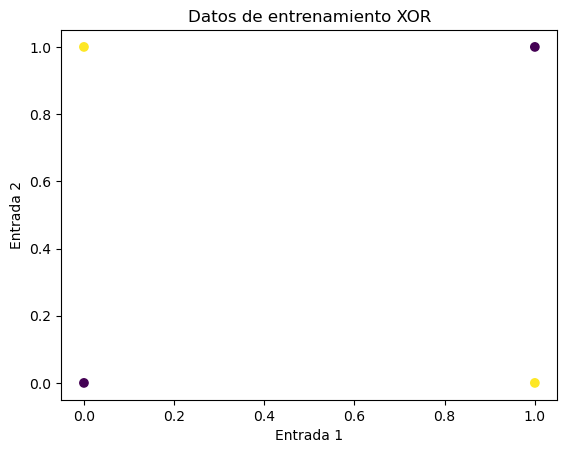

In [7]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), cmap='viridis')
plt.xlabel('Entrada 1')
plt.ylabel('Entrada 2')
plt.title('Datos de entrenamiento XOR')
#plt.colorbar(label='Clase')
plt.show()